# Gaming and Mental Health

From Kaggle:
> This dataset examines gaming behavior and its potential impact on sleep patterns and daily lifestyle. It includes demographic details, gaming duration, preferred genres, and sleep-related indicators.
  
> The dataset is designed to help researchers, students, and data analysts explore patterns between excessive gaming and lifestyle factors such as sleep quality and disruption.

Link: https://www.kaggle.com/datasets/shaistashahid/gaming-and-mental-health

In [127]:
import kagglehub
import pandas

# Download latest version
path = kagglehub.dataset_download("shaistashahid/gaming-and-mental-health")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\PC\.cache\kagglehub\datasets\shaistashahid\gaming-and-mental-health\versions\1


In [128]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# The `path` variable points to the directory of the downloaded f
filepath = Path(path) / Path("Gaming and Mental Health.csv")

data = pd.read_csv(filepath)

data.head()

,record_id,age,gender,daily_gaming_hours,game_genre,primary_game,gaming_platform,sleep_hours,sleep_quality,sleep_disruption_frequency,...,continued_despite_problems,eye_strain,back_neck_pain,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gaming_addiction_risk_level
0,GD0001,17,Male,11.1,Mobile Games,Clash of Clans,PC,3.7,Very Poor,Sometimes,...,True,True,False,6.8,3.7,7,1.3,383.70,3,Severe
1,GD0002,21,Male,3.0,MOBA,Dota 2,PC,7.2,Fair,Rarely,...,False,False,False,0.4,8.5,2,10.7,46.64,1,Low
2,GD0003,23,Male,7.6,FPS,CS:GO,Multi-platform,4.4,Fair,Often,...,True,False,True,1.8,7.1,5,3.2,100.81,6,Severe
3,GD0004,20,Female,7.2,RPG,Skyrim,Multi-platform,5.1,Fair,Often,...,False,True,True,0.2,5.2,4,9.1,51.60,7,High
4,GD0005,18,Male,6.8,Battle Royale,Apex Legends,PC,3.4,Poor,Never,...,False,False,False,0.5,6.1,4,4.5,32.57,1,Moderate


In [130]:
data.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   record_id                         1000 non-null   str    
 1   age                               1000 non-null   int64  
 2   gender                            1000 non-null   str    
 3   daily_gaming_hours                1000 non-null   float64
 4   game_genre                        1000 non-null   str    
 5   primary_game                      1000 non-null   str    
 6   gaming_platform                   1000 non-null   str    
 7   sleep_hours                       1000 non-null   float64
 8   sleep_quality                     1000 non-null   str    
 9   sleep_disruption_frequency        1000 non-null   str    
 10  academic_work_performance         1000 non-null   str    
 11  grades_gpa                        754 non-null    float64
 12  work_productivity_

The dataset contains 1000 records with 27 variables covering gaming habits, physical/mental health indicators, and social behavior. The following table describes each variable:

| Variable Name | Role | Type | Description | Units | Missing Values |
|---------------|------|------|-------------|-------|----------------|
| record_id | ID | Categorical | Unique identifier for each record | | no |
| age | Feature | Integer | Age of the participant | | no |
| gender | Feature | Categorical | Gender of the participant | | no |
| daily_gaming_hours | Feature | Float | Average daily gaming hours | hours | no |
| game_genre | Feature | Categorical | Primary genre of games played | | no |
| primary_game | Feature | Categorical | Main game played | | no |
| gaming_platform | Feature | Categorical | Platform used for gaming | | no |
| sleep_hours | Feature | Float | Average daily sleep hours | hours | no |
| sleep_quality | Feature | Categorical | Self-reported sleep quality | | no |
| sleep_disruption_frequency | Feature | Categorical | Frequency of sleep disruptions | | no |
| academic_work_performance | Feature | Categorical | Self-reported academic or work performance | | no |
| grades_gpa | Feature | Float | GPA or equivalent grade score | | yes |
| work_productivity_score | Feature | Float | Self-reported work productivity score | | yes |
| mood_state | Feature | Categorical | Current mood state | | no |
| mood_swing_frequency | Feature | Categorical | Frequency of mood swings | | no |
| withdrawal_symptoms | Feature | Boolean | Experiences withdrawal symptoms from gaming | | no |
| loss_of_other_interests | Feature | Boolean | Lost interest in other hobbies or activities | | no |
| continued_despite_problems | Feature | Boolean | Continues gaming despite negative consequences | | no |
| eye_strain | Feature | Boolean | Experiences eye strain | | no |
| back_neck_pain | Feature | Boolean | Experiences back or neck pain | | no |
| weight_change_kg | Feature | Float | Change in weight attributed to lifestyle | kg | no |
| exercise_hours_weekly | Feature | Float | Weekly exercise hours | hours | no |
| social_isolation_score | Feature | Integer | Score indicating level of social isolation | | no |
| face_to_face_social_hours_weekly | Feature | Float | Weekly face-to-face social interaction hours | hours | no |
| monthly_game_spending_usd | Feature | Float | Monthly spending on games | USD | no |
| years_gaming | Feature | Integer | Years of gaming experience | years | no |
| gaming_addiction_risk_level | **Target** | Categorical | Assessed gaming addiction risk level | | no |

# EDA

### Target variable analysis

Our target variable is `gaming_addiction_risk_level`, which indicates the assessed level of gaming addiction risk for each participant (Low, Moderate, High, or Severe).

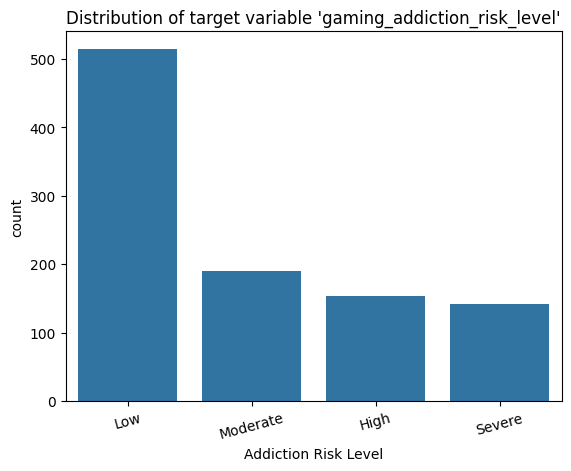

In [131]:
sns.countplot(data=data, x="gaming_addiction_risk_level", order=["Low", "Moderate", "High", "Severe"])
plt.title("Distribution of target variable 'gaming_addiction_risk_level'")
plt.xlabel("Addiction Risk Level")
plt.xticks(rotation=15)
plt.show()

The distribution is highly imbalanced.

*Low risk* predominates with ~51.4% of participants (514). Moderate (19%), High (15.4%), and Severe (14.2%) make up the remainder. 

This imbalance means a classifier that always predicts "Low" would already achieve ~51% accuracy, so we should prioritize recall or F1-score over accuracy when evaluating models.

### Feature analysis

Let's start by understanding the descriptive statistics of the dataset.

In [132]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,20.475000,4.116105,13.00,18.0000,20.000,22.0000,35.00
daily_gaming_hours,1000.0,6.151400,2.867194,0.50,4.1000,6.000,8.0250,15.10
sleep_hours,1000.0,5.738100,1.441213,3.00,4.8000,5.700,6.6000,9.00
grades_gpa,754.0,2.518037,0.872312,1.01,1.7600,2.530,3.2800,4.00
work_productivity_score,674.0,5.394659,2.898742,1.00,3.0000,5.000,8.0000,10.00
weight_change_kg,1000.0,1.513400,1.432212,0.00,0.4000,1.100,2.1000,8.90
exercise_hours_weekly,1000.0,6.945900,1.805027,0.70,5.7000,7.000,8.2000,11.50
social_isolation_score,1000.0,3.872000,2.091409,1.00,2.0000,4.000,5.0000,10.00
face_to_face_social_hours_weekly,1000.0,7.654500,3.751954,0.00,5.0000,8.000,10.4000,16.70
monthly_game_spending_usd,1000.0,105.219730,113.886768,0.10,32.5925,66.405,126.2425,499.27


We can also visualize the distribution of numerical features.

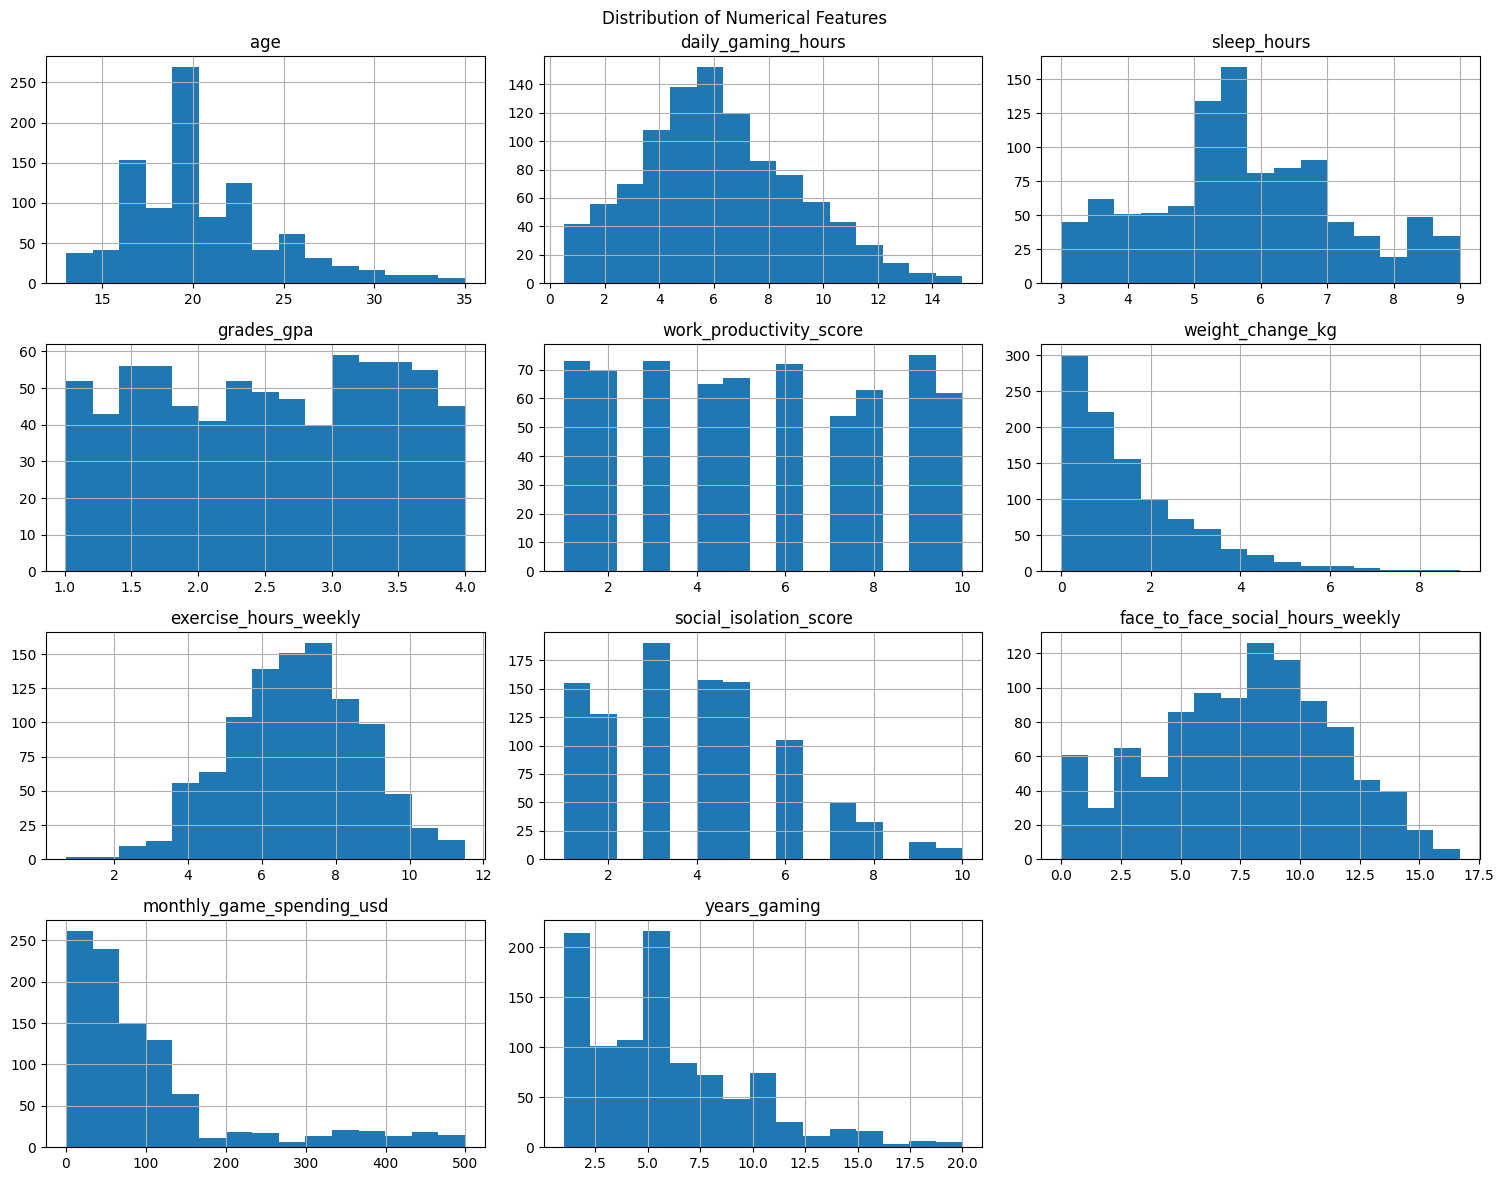

In [133]:
numerical_features = [
    "age", "daily_gaming_hours", "sleep_hours", "grades_gpa",
    "work_productivity_score", "weight_change_kg", "exercise_hours_weekly",
    "social_isolation_score", "face_to_face_social_hours_weekly",
    "monthly_game_spending_usd", "years_gaming"
]

data[numerical_features].hist(bins=15, figsize=(15, 12))
plt.suptitle("Distribution of Numerical Features")
plt.tight_layout()
plt.show()

Let's also look at the distribution of categorical features.

Note that we exclude `primary_game` beacuse it contains too many unique game titles to visualize meaningfully. (cardinality)

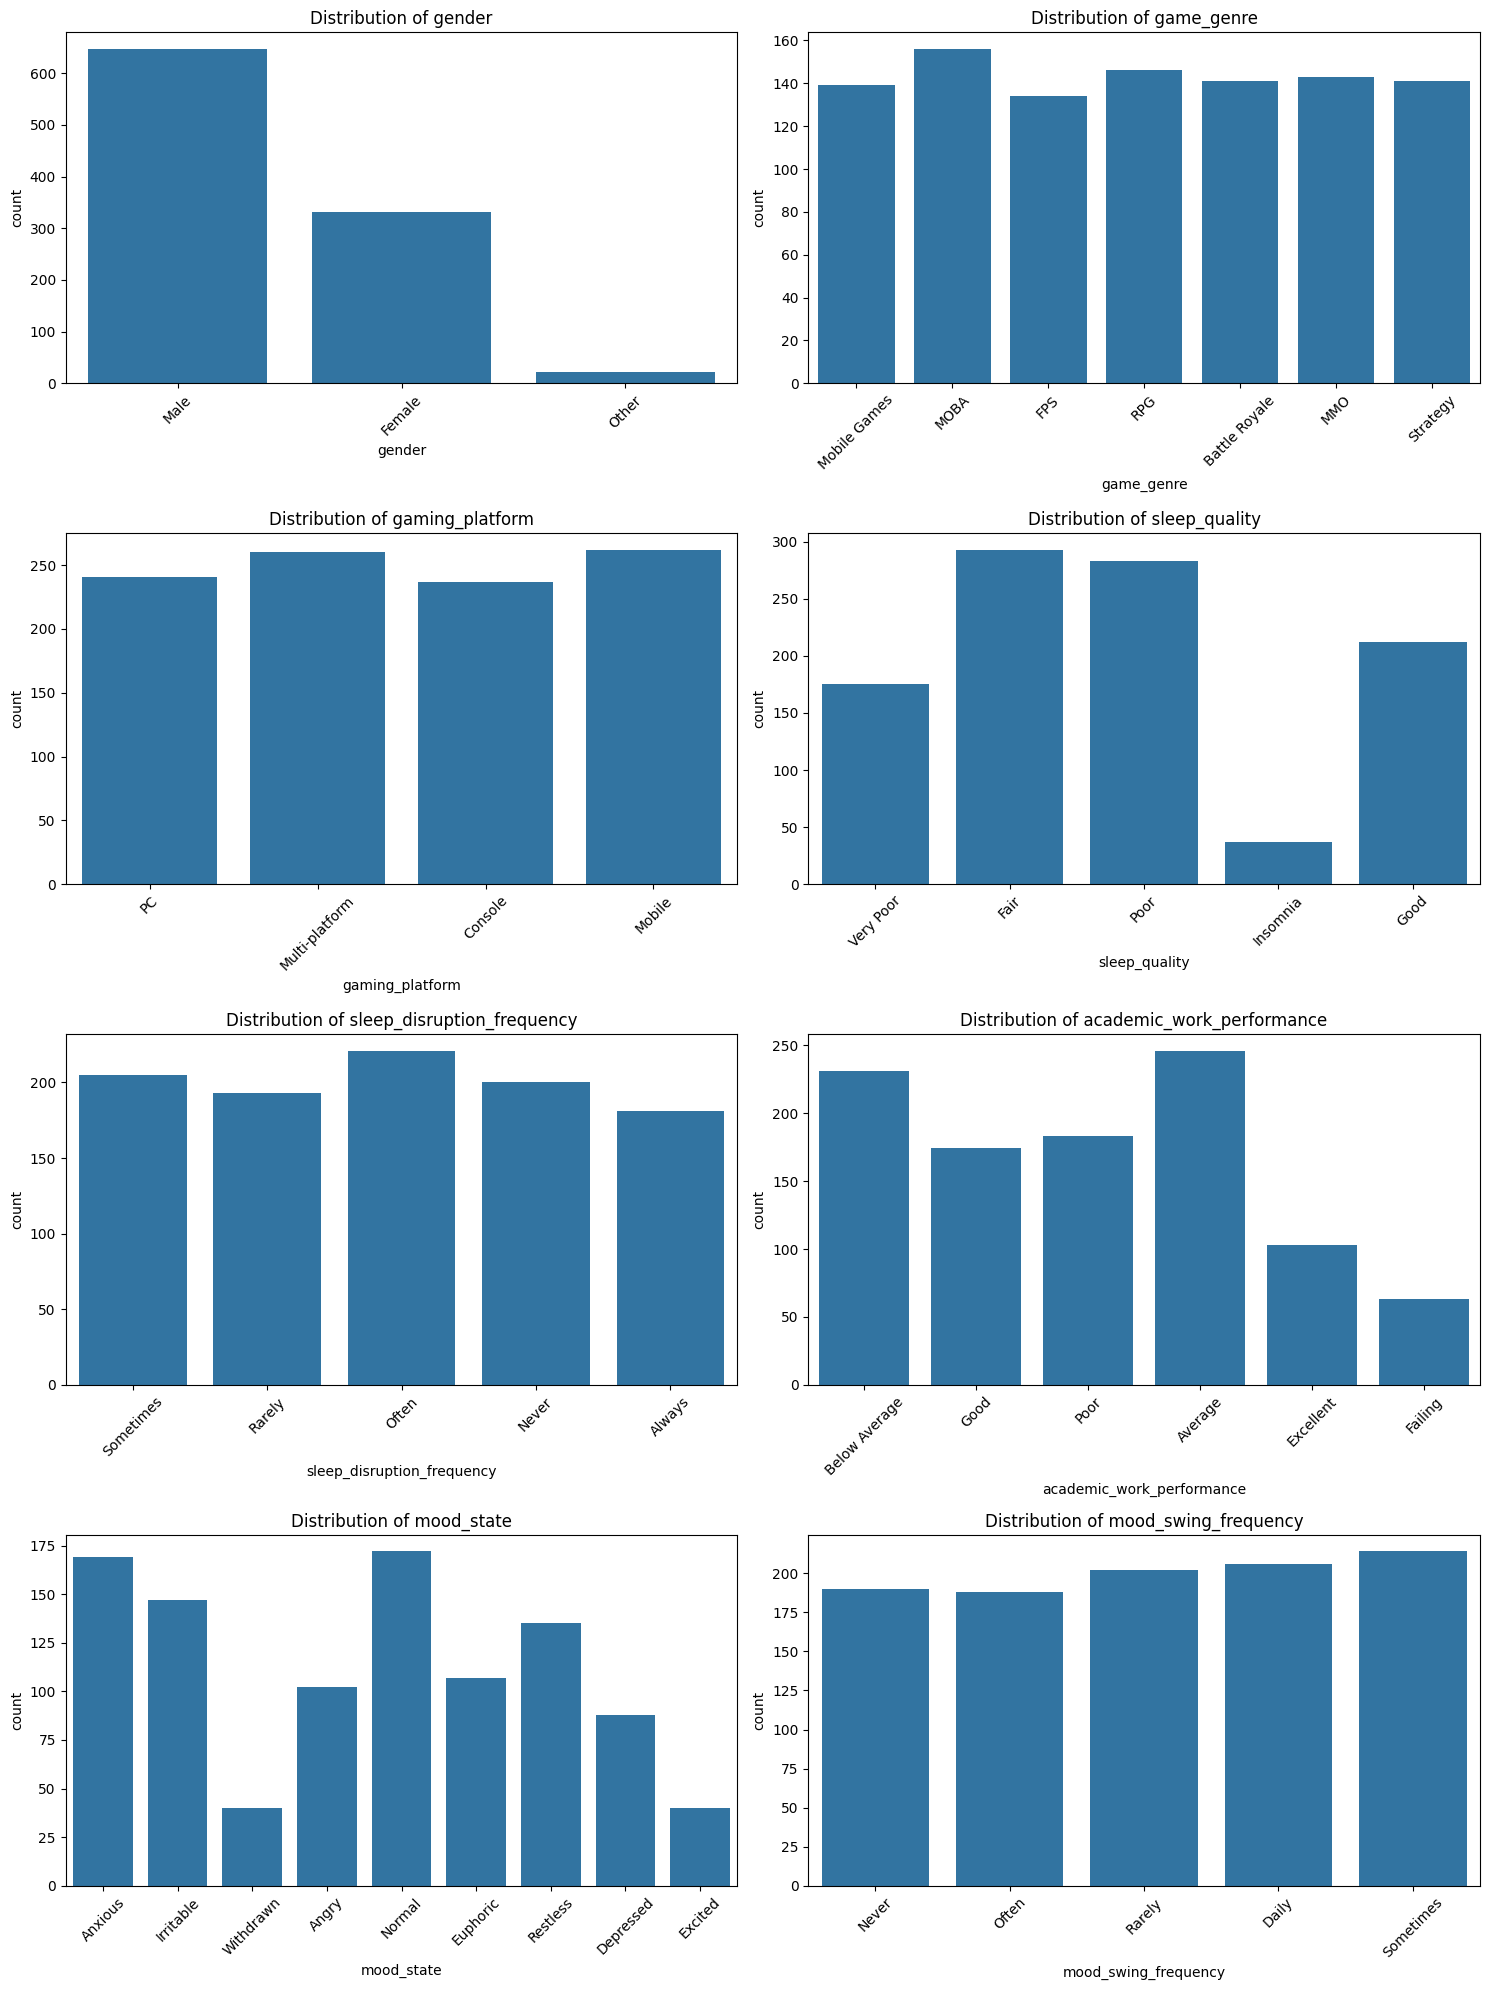

In [134]:
categorical_features = ["gender", "game_genre", "gaming_platform", "sleep_quality",
                        "sleep_disruption_frequency", "academic_work_performance",
                        "mood_state", "mood_swing_frequency"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, feature in zip(axes.ravel(), categorical_features):
    sns.countplot(data=data, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

Particularily, the boolean features in this dataset represent behavioral indicators of gaming addiction. This could mean withdrawal symptoms and loss of other interests.

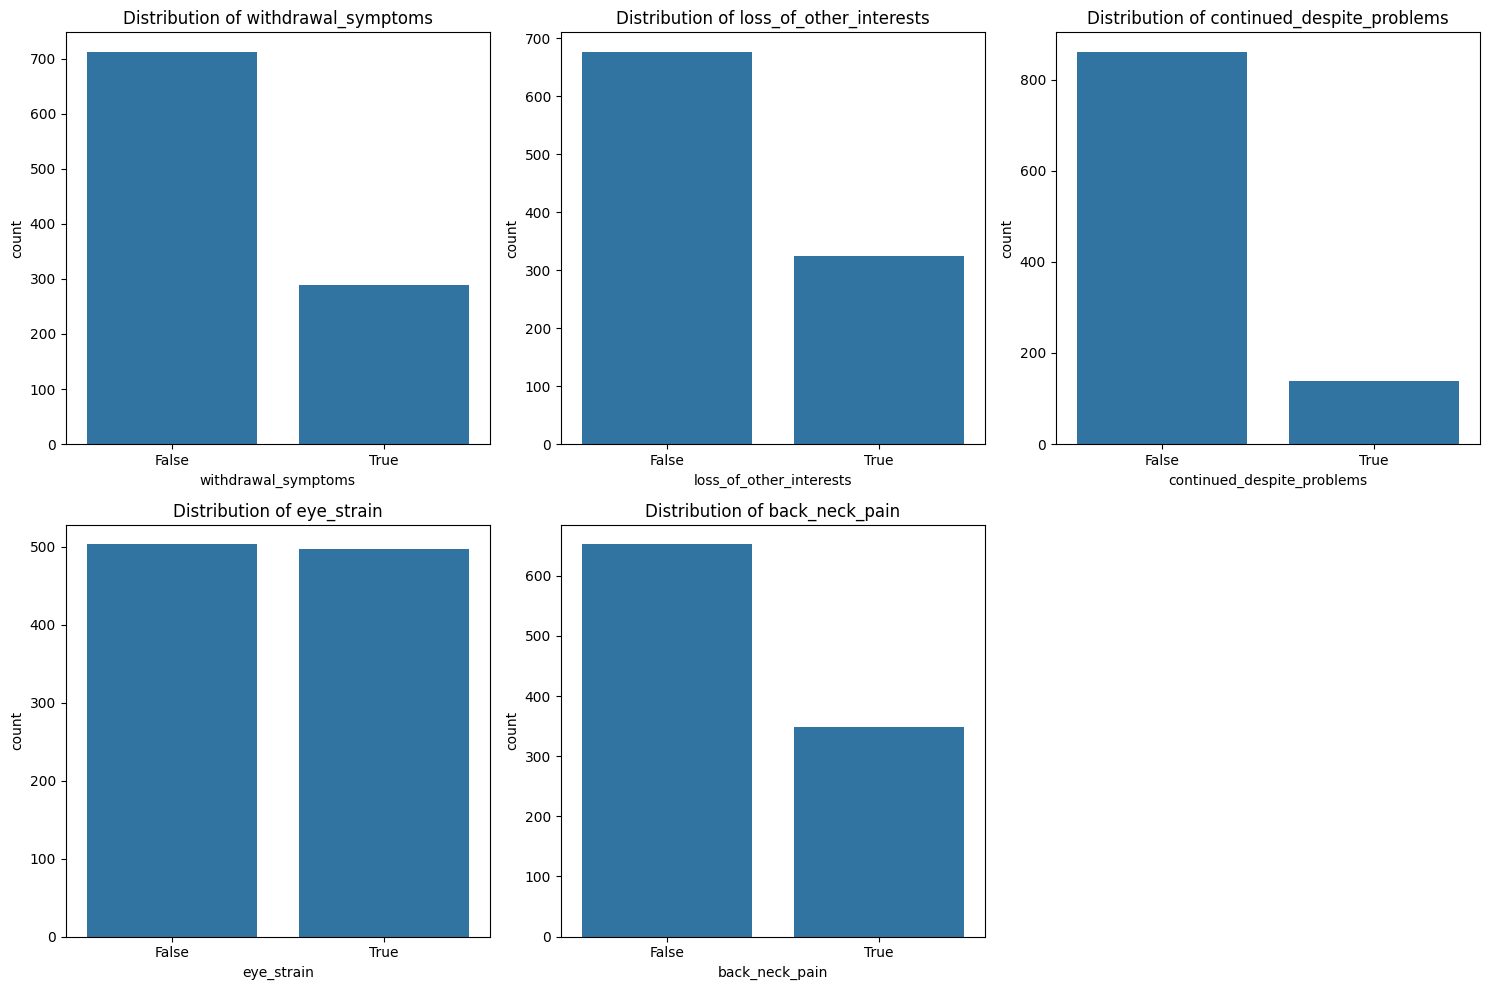

In [135]:
boolean_features = ["withdrawal_symptoms", "loss_of_other_interests",
                    "continued_despite_problems", "eye_strain", "back_neck_pain"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, feature in zip(axes.ravel(), boolean_features):
    sns.countplot(data=data, x=feature, ax=ax)
    ax.set_title(f"Distribution of {feature}")

axes.ravel()[-1].set_visible(False)
plt.tight_layout()

We can also explore the proportion of missing values in the dataset.

In [136]:
missing_values = data.isna().mean() * 100
print("Proportion of missing values for all features:")
print(missing_values)

Proportion of missing values for all features:
record_id                            0.0
age                                  0.0
gender                               0.0
daily_gaming_hours                   0.0
game_genre                           0.0
primary_game                         0.0
gaming_platform                      0.0
sleep_hours                          0.0
sleep_quality                        0.0
sleep_disruption_frequency           0.0
academic_work_performance            0.0
grades_gpa                          24.6
work_productivity_score             32.6
mood_state                           0.0
mood_swing_frequency                 0.0
withdrawal_symptoms                  0.0
loss_of_other_interests              0.0
continued_despite_problems           0.0
eye_strain                           0.0
back_neck_pain                       0.0
weight_change_kg                     0.0
exercise_hours_weekly                0.0
social_isolation_score               0.0
face_to_fa

From the data summary, only `grades_gpa` and `work_productivity_score` have missing values. This is likely because some participants are students (which means no work productivity score) and others are adults who work (which means no GPA). 

The missing values are **24.6%** and **32.6%** respectively, which is significant enough. However, this could require imputation rather than simply dropping those rows.

Let's also explore the relationship between some of the features and the target variable. For numerical features, we can use boxplots to visualize the distribution of the feature values for each class of the target variable.

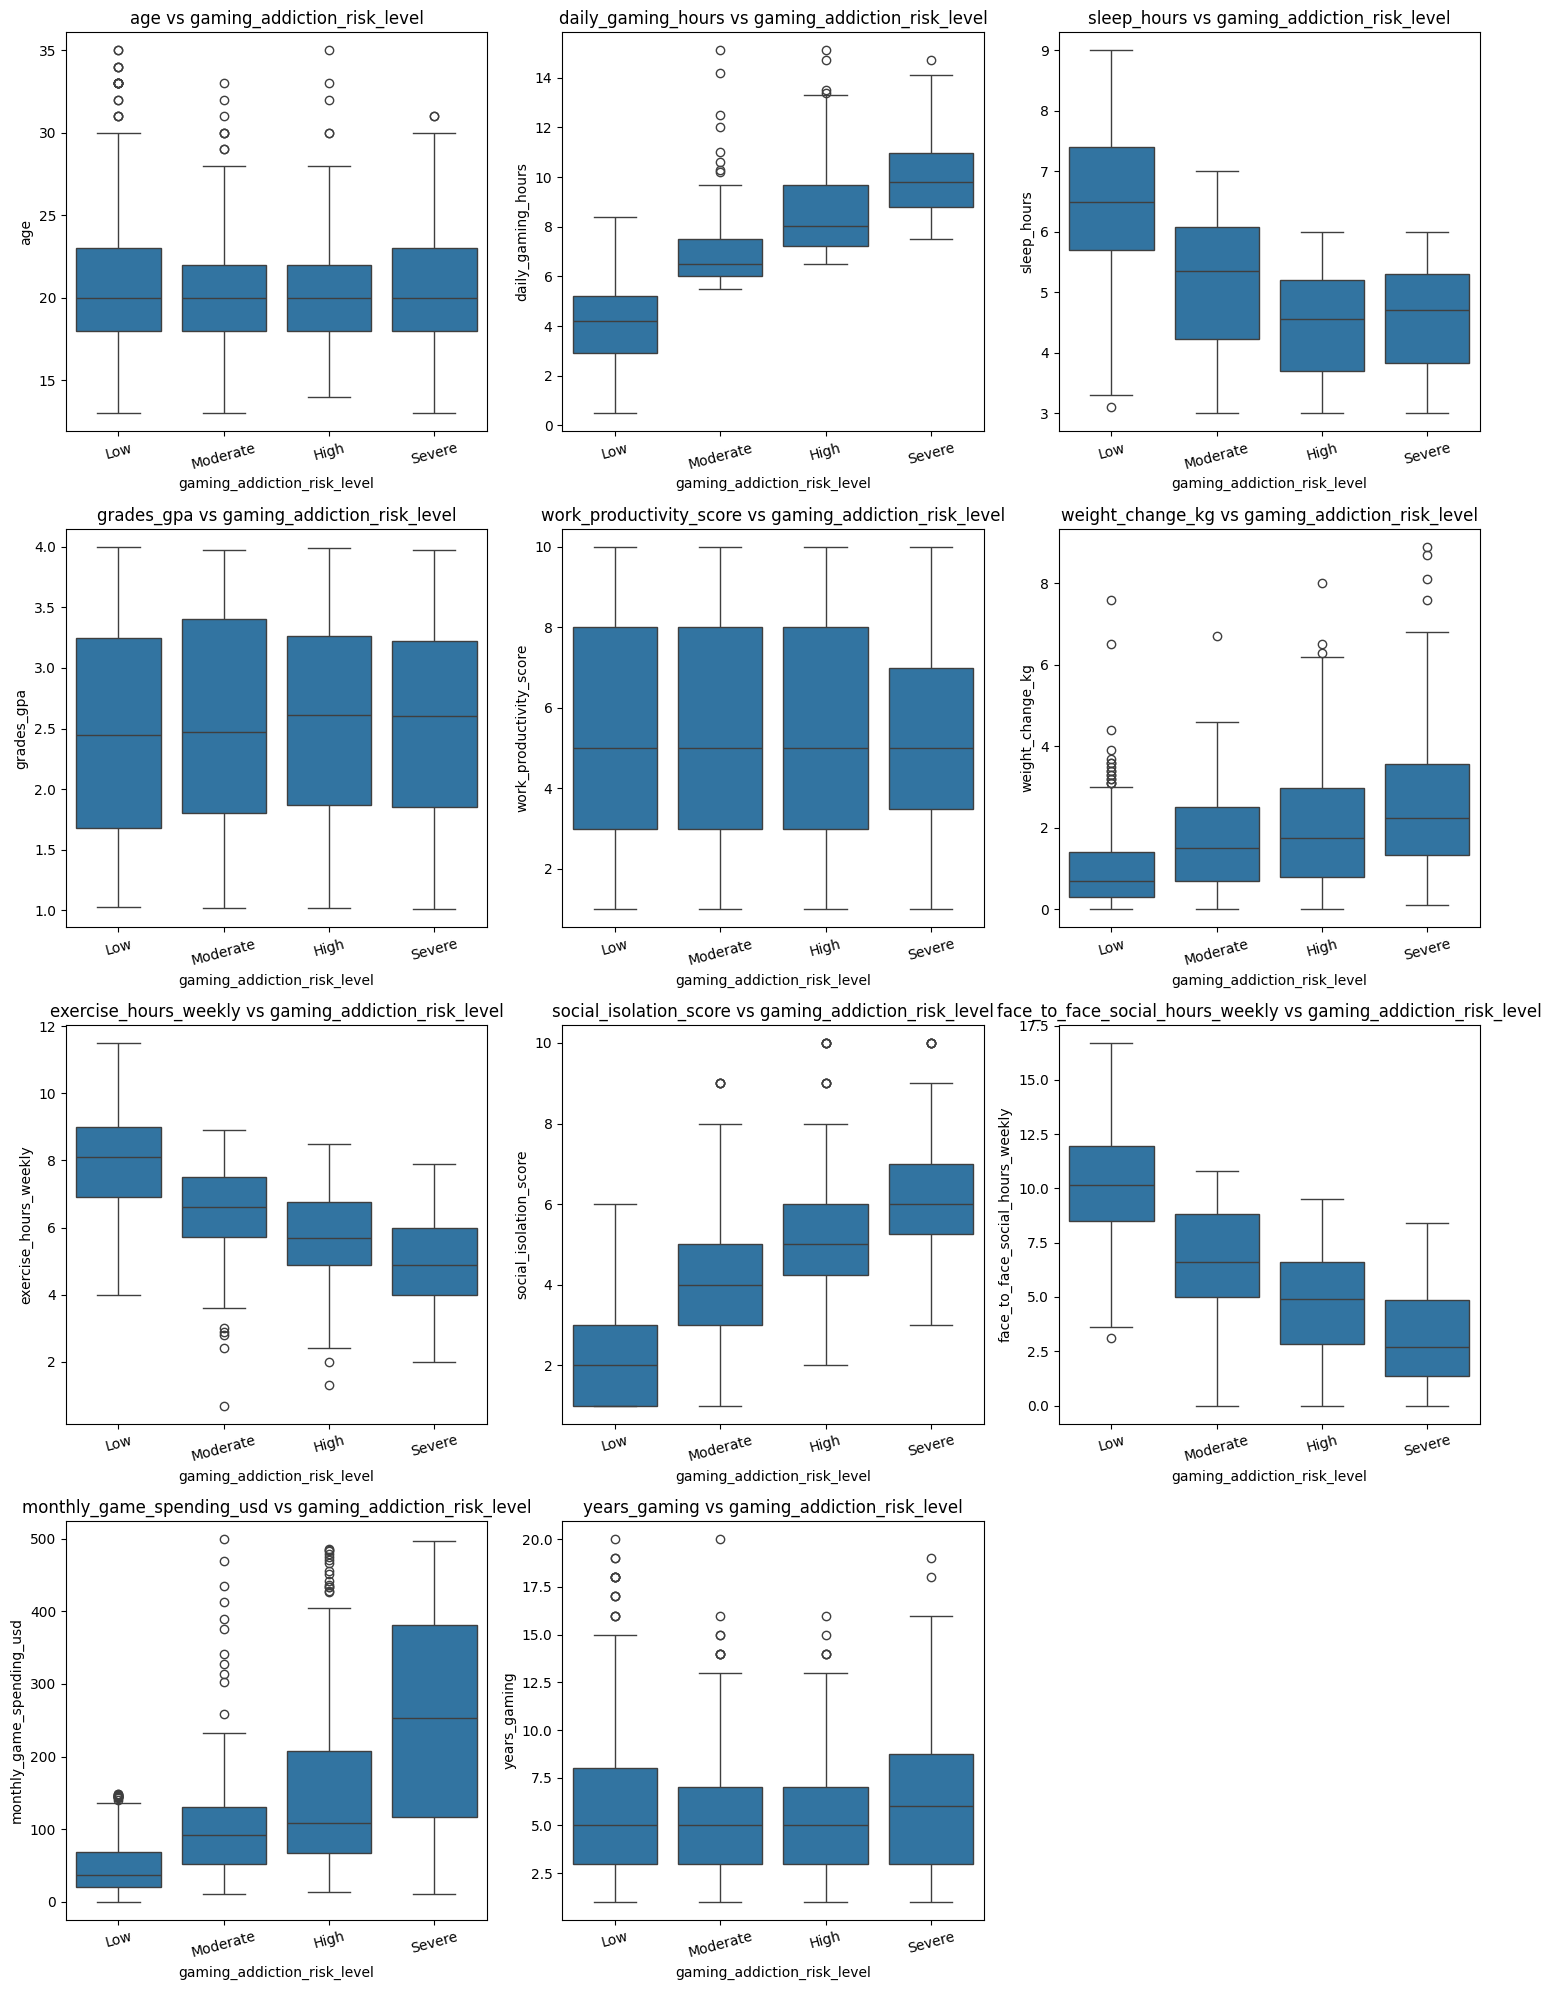

In [137]:
target_order = ["Low", "Moderate", "High", "Severe"]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

for ax, feature in zip(axes.ravel(), numerical_features):
    sns.boxplot(data=data, x="gaming_addiction_risk_level", y=feature,
                order=target_order, ax=ax)
    ax.set_title(f"{feature} vs gaming_addiction_risk_level")
    ax.tick_params(axis='x', rotation=15)

for ax in axes.ravel()[len(numerical_features):]:
    ax.set_visible(False)

plt.tight_layout()

We can also use countplots to visualize the relationship between categorical features and the target variable.

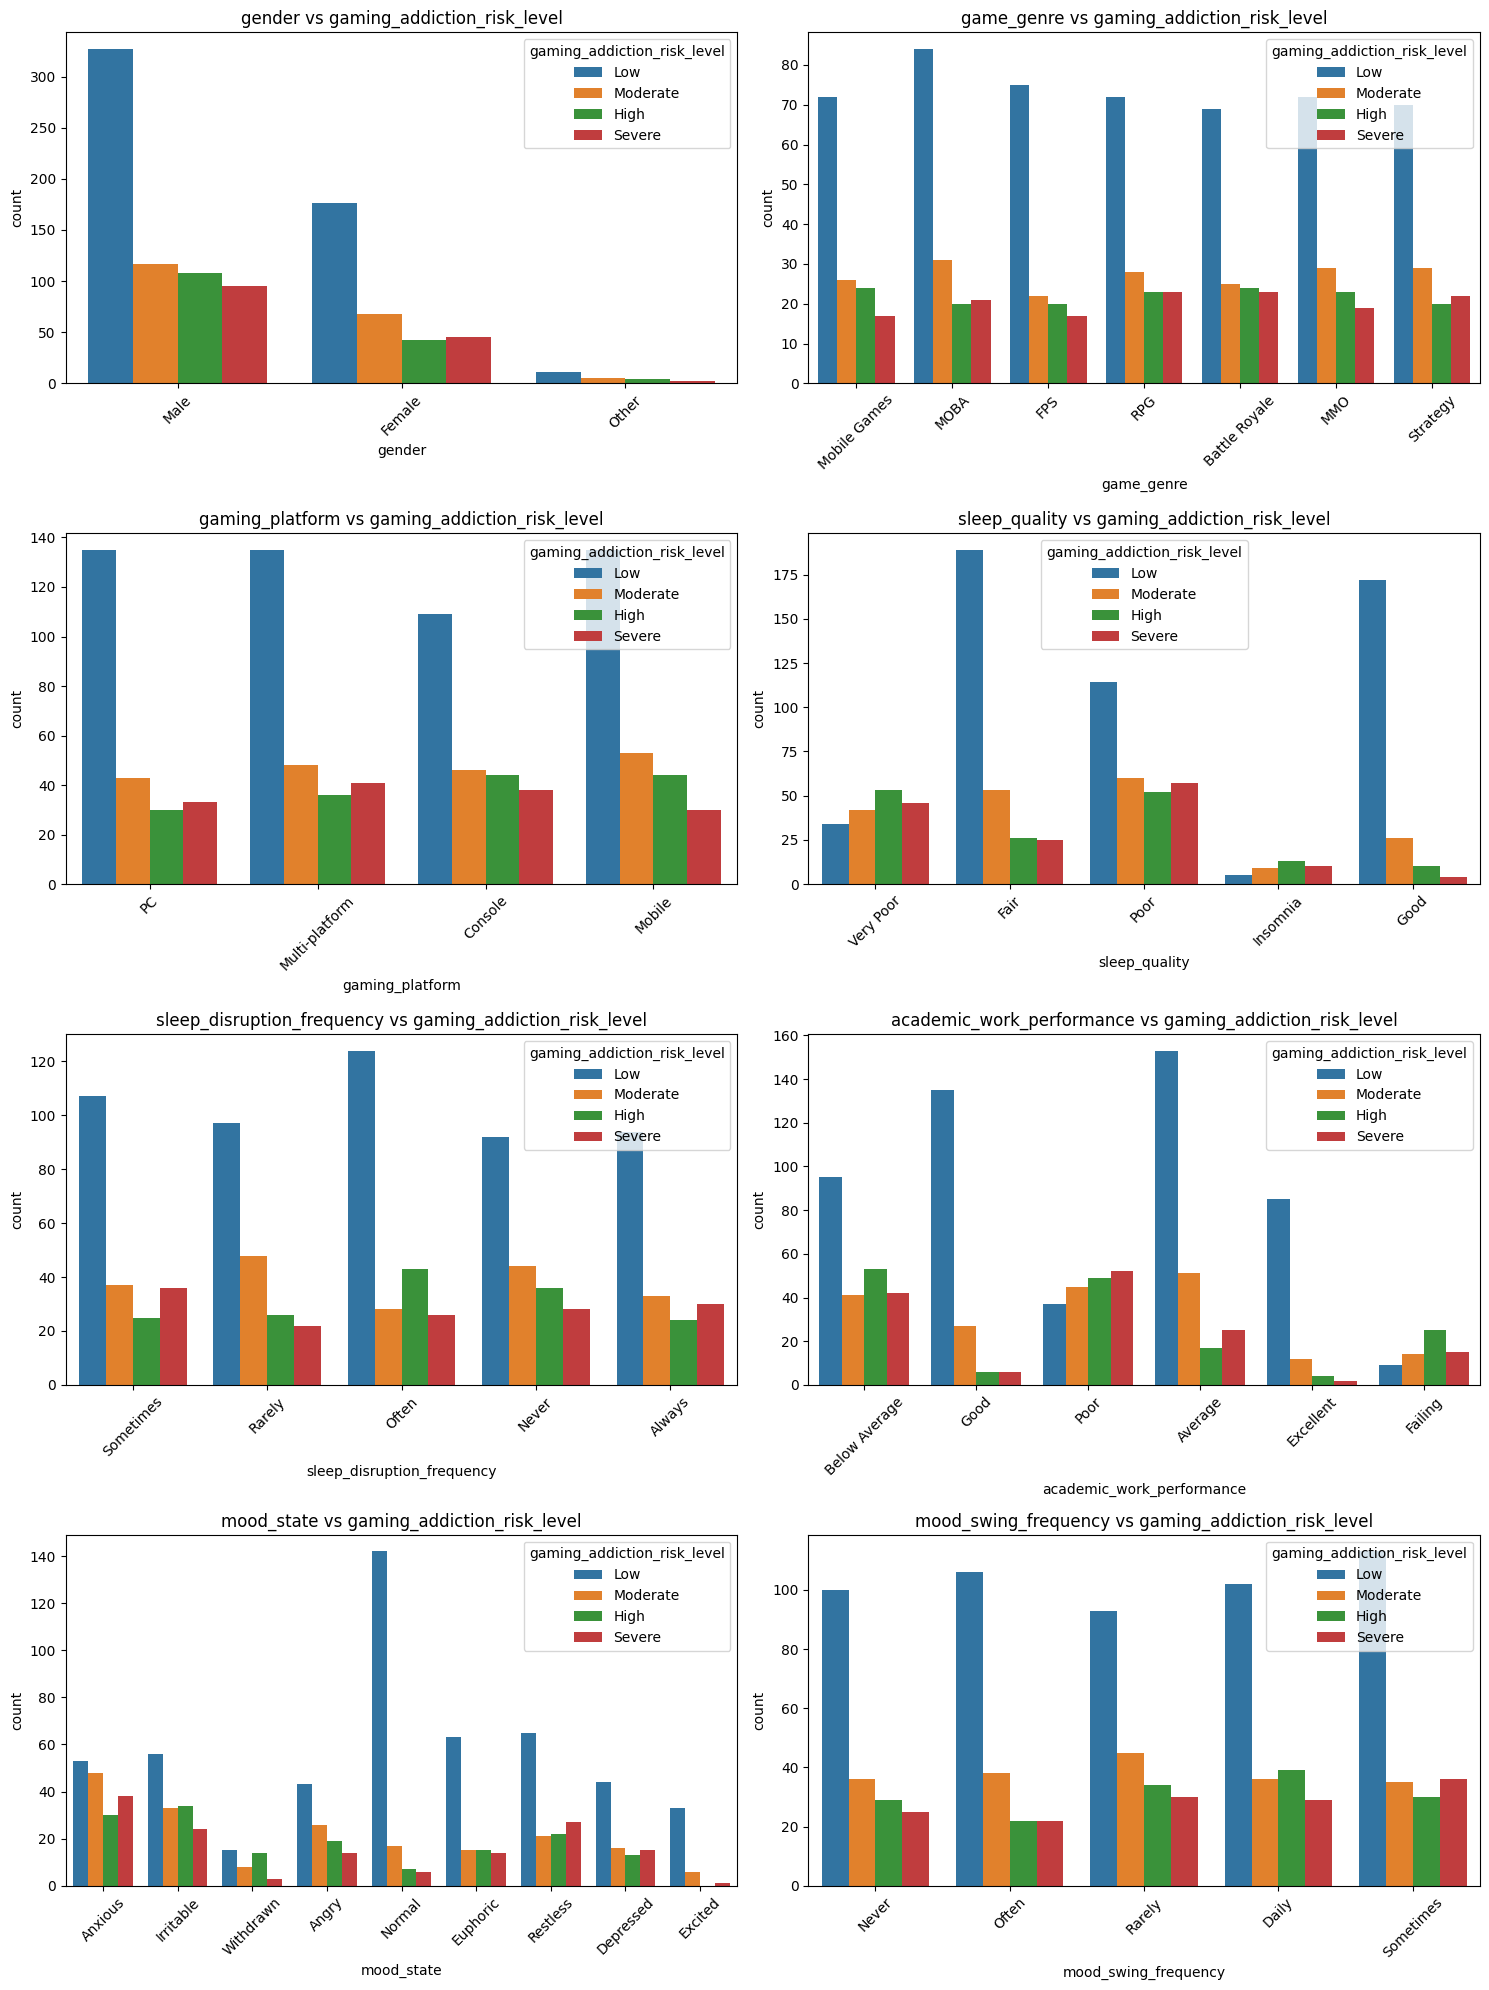

In [138]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

for ax, feature in zip(axes.ravel(), categorical_features):
    sns.countplot(data=data, x=feature, hue="gaming_addiction_risk_level",
                  hue_order=target_order, ax=ax)
    ax.set_title(f"{feature} vs gaming_addiction_risk_level")
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()

Similarly, let's look at how boolean features relate to the target.

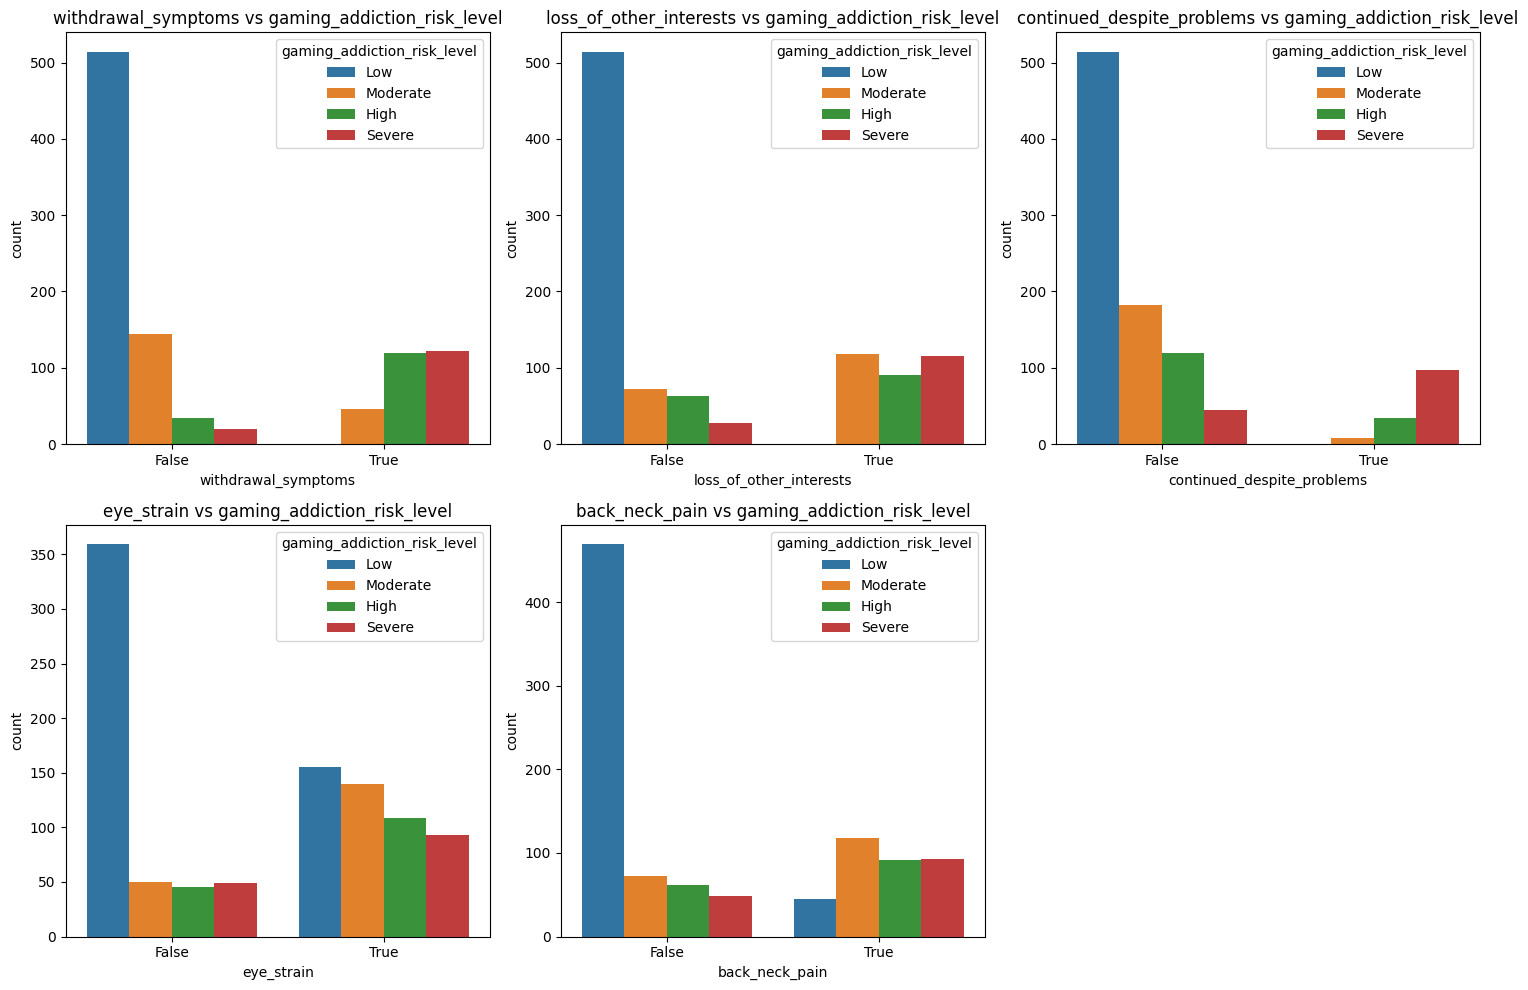

In [139]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for ax, feature in zip(axes.ravel(), boolean_features):
    sns.countplot(data=data, x=feature, hue="gaming_addiction_risk_level",
                  hue_order=target_order, ax=ax)
    ax.set_title(f"{feature} vs gaming_addiction_risk_level")

axes.ravel()[-1].set_visible(False)
plt.tight_layout()

Here we can derive a few insights from the visualizations:

Numerical features vs target:
- `daily_gaming_hours` increases consistently with addiction risk, likely the strongest predictor.
- `sleep_hours` drops as the target gets higher, with evident outliers.
- `social_isolation_score` rises with risk while `face_to_face_social_hours_weekly` falls, showing higher-risk participants are more isolated.
- `monthly_game_spending_usd` grows with risk level, suggesting spending is a signal of addiction.
- `exercise_hours_weekly` drops as risk increases.
- `grades_gpa` stays almost flat across all target categories, so it is probably not a useful predictor on its own.

Categorical features vs target:
- The dataset is mostly of type `male`, though gender alone does not appear to strongly predict any particular risk level.
- Sleep quality is poor across the board and gets noticeably worse at higher risk levels.
- Game genre and gaming platform are evenly spread across risk levels, so they are probably not useful for predicting severity. A poor distribution is the cause of this.

Boolean behavioral indicators vs target:
- `withdrawal_symptoms` is rare in low risk participants and very common in severe cases. It is one of the strongest predictors.
- `continued_despite_problems` rises at higher risk levels.
- `loss_of_other_interests` shows up in most moderate risk cases, suggesting it appears earlier in the progression than the rest.
- `eye_strain` and `back_neck_pain` both spike early and then stop. They seem to show how long someone games rather than how addicted they are (target).

## Feature Selection

Based on the EDA, we can decide which features to keep and which to remove before preprocessing.

| Feature | Decision | Reason |
|---------|----------|--------|
| record_id | Remove | Unique identifier with no predictive value |
| age | Keep | Keep for representation. |
| gender | Keep | Keep for representation |
| daily_gaming_hours | Keep | Strongest predictor |
| game_genre | Keep | Low cardinality |
| primary_game | Remove | High cardinality, no pattern |
| gaming_platform | Keep | Low cardinality |
| sleep_hours | Keep | Strong predictor. Drops clearly with higher addiction risk |
| sleep_quality | Keep | Moderate predictor. Worsens noticeably at higher risk levels |
| sleep_disruption_frequency | Keep | Moderate predictor. Related to sleep health and gaming habits |
| academic_work_performance | Keep | Moderate predictor. Performance worsens with higher risk |
| grades_gpa | Remove | No pattern and 24.6% missing values |
| work_productivity_score | Remove | 32.6% missing values |
| mood_state | Keep | Moderate predictor. |
| mood_swing_frequency | Keep | Moderate predictor. |
| withdrawal_symptoms | Keep | Strongest predictor. |
| loss_of_other_interests | Keep | Keep for representation. Appears early in risk level |
| continued_despite_problems | Keep | Strong separator between high and severe risk |
| eye_strain | Keep | Keep for representation. Correlated with gaming session length |
| back_neck_pain | Keep | Keep for representation. Correlated with gaming session length |
| weight_change_kg | Keep | Keep for representation. |
| exercise_hours_weekly | Keep | Keep for representation. Pattern. Drops with target |
| social_isolation_score | Keep | Keep for representation. Rises with target |
| face_to_face_social_hours_weekly | Keep | Keep for representation. Drops with target |
| monthly_game_spending_usd | Keep | Keep for representation. Grows with target |
| years_gaming | Keep | Keep for representation. |
| gaming_addiction_risk_level | Target | Target variable |

In [140]:
x = data.drop(columns=["gaming_addiction_risk_level", "record_id", "primary_game", "grades_gpa", "work_productivity_score"])
y = data["gaming_addiction_risk_level"]

## Data Preprocessing

Now that we have selected our features, we can build the preprocessing pipeline.

In [141]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer

Before defining the pipeline, we encode the target variable as a **numeric ordinal** since the risk levels have a *clear order*. 

We also drop the two features with missing values (`grades_gpa` and `work_productivity_score`) from the start, so no imputation is needed for the remaining features.

In [142]:
y = y.map({"Low": 0, "Moderate": 1, "High": 2, "Severe": 3})

We can now split the dataset into training and testing sets.

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Let's define the preprocessing pipeline. 

- For numerical features we apply a `PowerTransformer` to obtain a normal distribution, since features like `monthly_game_spending_usd` are heavily leaning to the right. 
- For categorical features we apply `OneHotEncoder`. 
- The boolean features are passed through with `remainder="passthrough"` since they are already binary.
- We also set `verbose_feature_names_out=False` for cleaner column names after transformation.

In [144]:
numerical_cols = [
    "age", "daily_gaming_hours", "sleep_hours", "weight_change_kg",
    "exercise_hours_weekly", "social_isolation_score",
    "face_to_face_social_hours_weekly", "monthly_game_spending_usd", "years_gaming"
]

categorical_cols = [
    "gender", "game_genre", "gaming_platform", "sleep_quality",
    "sleep_disruption_frequency", "academic_work_performance",
    "mood_state", "mood_swing_frequency"
]

preprocessing = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("num", PowerTransformer(), numerical_cols),
            ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
        ],
        remainder="passthrough",
        verbose_feature_names_out=False
    )
)

Let's transform the training data using our preprocessing pipeline and take a look at the result.

In [145]:
X_train = preprocessing.fit_transform(X_train)
feature_names = preprocessing.named_steps["columntransformer"].get_feature_names_out()
X_train = pd.DataFrame(X_train, columns=feature_names)
X_train.head()

,age,daily_gaming_hours,sleep_hours,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gender_Female,...,mood_swing_frequency_Daily,mood_swing_frequency_Never,mood_swing_frequency_Often,mood_swing_frequency_Rarely,mood_swing_frequency_Sometimes,withdrawal_symptoms,loss_of_other_interests,continued_despite_problems,eye_strain,back_neck_pain
0,-0.228181,-0.429057,0.094998,-0.711344,-0.777245,-0.273581,0.610554,0.640241,0.732586,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.854290,-1.604439,0.953728,-1.531810,2.241871,-1.602579,1.012073,-0.877027,0.273103,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.476142,0.969838,-0.922300,0.401303,-0.669861,1.037878,-1.176368,1.375832,-1.730565,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.311539,-1.324893,1.266396,-0.711344,1.006420,-1.602579,1.548017,-2.998108,1.284806,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.228181,0.339985,-1.643878,1.615842,-0.990148,-0.273581,-0.030948,0.642744,0.514643,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0


Let's repeat the same transformation for the testing data. Note that we use `transform` instead of `fit_transform` to ensure the same parameters learned from the training data are applied.

In [146]:
X_test = preprocessing.transform(X_test)
feature_names = preprocessing.named_steps["columntransformer"].get_feature_names_out()
X_test = pd.DataFrame(X_test, columns=feature_names)
X_test.head()

,age,daily_gaming_hours,sleep_hours,weight_change_kg,exercise_hours_weekly,social_isolation_score,face_to_face_social_hours_weekly,monthly_game_spending_usd,years_gaming,gender_Female,...,mood_swing_frequency_Daily,mood_swing_frequency_Never,mood_swing_frequency_Often,mood_swing_frequency_Rarely,mood_swing_frequency_Sometimes,withdrawal_symptoms,loss_of_other_interests,continued_despite_problems,eye_strain,back_neck_pain
0,0.045769,0.240470,-0.546044,0.999194,-0.124177,0.652771,-0.217802,-0.551070,0.273103,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,-1.613947,0.372833,-1.235356,-1.531810,0.776456,0.221254,-1.070104,0.002471,0.001414,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,-0.854290,0.139439,0.366920,-0.282769,0.491614,-0.273581,-0.057649,-0.532372,0.514643,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,-1.214750,0.502682,-0.327521,0.794524,-0.669861,-0.273581,0.262919,0.033469,-0.310315,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
4,1.136018,1.381866,-0.620050,-0.413138,-1.864130,1.037878,-0.511160,1.696720,0.514643,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0


## Model Training and Evaluation

### Defining objective metrics

This is a multi-class classification problem with four risk levels and significant class imbalance (Low risk makes up ~51% of the dataset). The table below describes each candidate metric and why it was kept or discarded.

| Metric | Decision | Reason |
|--------|----------|--------|
| Accuracy | No | A model that always predicts "Low" would score ~51% without learning anything useful |
| Precision | No | Only rewards correct predictions but does not penalize missing true *High* or *Severe* cases |
| Recall | No | Minimizes missed cases but does not penalize a model that predicts every class with false positives |
| AUC-ROC | No | Requires probability outputs rather than class predictions |
| **F1-score** | **Yes** | Balances *precision* and *recall*, making it more representative than just a single on. Because of class imbalance, we pick this. |

Particularily, we use F1-Score *macro* because it calculates each score independently and averages them, whereas micro is an aggregate of all. Macro provides more balance and gives each class the same importance.

In [147]:
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def evaluate_model(model, x, y):
    y_pred = model.predict(x)
    return f1_score(y, y_pred, average="weighted")

### Training and evaluating different models

#### Model 1 - Logistic Regression

In [148]:
lr_param_grid = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["lbfgs", "saga"],
    "class_weight": [None, "balanced"]
}

lr_grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    lr_param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)
lr_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'class_weight': [None, 'balanced'], 'solver': ['lbfgs', 'saga']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 

#### Model 2 - Random Forest Classifier

In [149]:
rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "class_weight": [None, "balanced"]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    rf_param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)
rf_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': [None, 'balanced'], 'max_depth': [None, 5, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and para

#### Model 3 - Gradient Boosting

In [150]:
gb_param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1, 0.2],
    "max_depth": [3, 5],
    "subsample": [0.8, 1.0]
}

gb_grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    gb_param_grid,
    scoring="f1_macro",
    cv=5,
    n_jobs=-1
)
gb_grid.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",GradientBoost...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.05, 0.1, ...], 'max_depth': [3, 5], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candida

### Comparing model performance

We compare the best estimator from each grid search on the test set, alongside the cross-validated training score, to check for overfitting.

In [151]:
best_lr = lr_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_gb = gb_grid.best_estimator_

models = {
    "Logistic Regression": best_lr,
    "Random Forest": best_rf,
    "Gradient Boosting": best_gb
}

grid_scores = {
    "Logistic Regression": lr_grid.best_score_,
    "Random Forest": rf_grid.best_score_,
    "Gradient Boosting": gb_grid.best_score_
}

comparison_df = pd.DataFrame({
    name: {
        "Test F1": evaluate_model(model, X_test, y_test),
        "GridSearchCV F1": grid_scores[name]
    }
    for name, model in models.items()
}).T

comparison_df["Overfitting"] = comparison_df["Test F1"] - comparison_df["GridSearchCV F1"]
comparison_df

,Test F1,GridSearchCV F1,Overfitting
Logistic Regression,0.931016,0.917640,0.013376
Random Forest,0.965177,0.920364,0.044813
Gradient Boosting,0.995025,0.978138,0.016887


### Best model analysis

We pick the model with the highest F1-score and evaluate it with a confusion matrix and classification report.

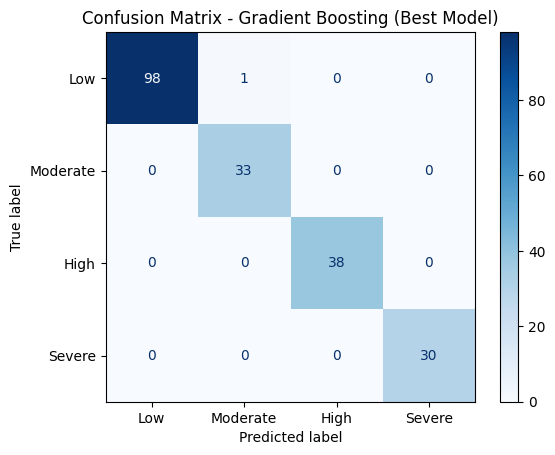

In [152]:
best_model_name = comparison_df["Test F1"].idxmax()
best_model = models[best_model_name]

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Moderate", "High", "Severe"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name} (Best Model)")
plt.show()

And its classification report:

In [153]:
report = classification_report(y_test, y_pred, target_names=["Low", "Moderate", "High", "Severe"], output_dict=True)
report_df = pd.DataFrame(report).T
report_df

,precision,recall,f1-score,support
Low,1.000000,0.989899,0.994924,99.000
Moderate,0.970588,1.000000,0.985075,33.000
High,1.000000,1.000000,1.000000,38.000
Severe,1.000000,1.000000,1.000000,30.000
accuracy,0.995000,0.995000,0.995000,0.995
macro avg,0.992647,0.997475,0.995000,200.000
weighted avg,0.995147,0.995000,0.995025,200.000


## Final Remarks

The best model was **Gradient Boosting**.
- With a Test F1 of 0.995 and only 0.017 overfitting. This means it predicted very well and was not simply memorizing the training data.
- Logistic Regression and Random Forest also performed well (0.931% and 0.965%, respectively).

The classification report confirms that precision and recall are near 1.0 (perfect) for all risk levels (the target). The only imperfection was one sample misclassified.

This near-perfect results and very little overfitting:
- In synthetic datasets, the features tend to follow clean rules that directly determine the target, and their distributions are carefully calculated to improve machine learning tasks.

What could be done better:
- Features like `withdrawal_symptoms` and `continued_despite_problems` could be considered data leakage if they were used to define the target

## Model Serialization

ONNX is a format for saving trained models in a way that is independent of the library used to train them.

To include the preprocessing pipeline in the ONNX file, we combine both steps into a single `sklearn.pipeline.Pipeline` and use `convert_sklearn`.

Because the raw input has mixed types (floats, strings, booleans), we must declare the schema of each feature explicitly via `initial_types` . ONNX cannot infer these types automatically.

In [156]:
from sklearn.pipeline import Pipeline
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType, StringTensorType, Int64TensorType
import numpy as np

# Combine preprocessing and classifier into one deployable pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("classifier", best_model)
])

# Boolean columns must be declared as Int64
col_types = (
    {col: FloatTensorType([None, 1]) for col in numerical_cols} |
    {col: StringTensorType([None, 1]) for col in categorical_cols} |
    {col: Int64TensorType([None, 1]) for col in boolean_features}
)
initial_types = [(col, col_types[col]) for col in x.columns]

onnx_model = convert_sklearn(
    full_pipeline,
    initial_types=initial_types,
    target_opset=13,
    options={id(best_model): {"zipmap": False}}
)

with open("best_model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Full pipeline (preprocessing + classifier) saved to best_model.onnx")

Full pipeline (preprocessing + classifier) saved to best_model.onnx


Since each feature is a named ONNX input, we pass raw data as a dictionary keyed by column name. 

No manual preprocessing step is needed because the pipeline is already serialized

In [157]:
import onnxruntime as ort

session = ort.InferenceSession("best_model.onnx")

raw_sample = x.iloc[:5]

# Boolean columns must be cast to int64 to match the declared Int64TensorType
input_feed = (
    {col: raw_sample[[col]].values.astype(np.float32) for col in numerical_cols} |
    {col: raw_sample[[col]].values for col in categorical_cols} |
    {col: raw_sample[[col]].values.astype(np.int64) for col in boolean_features}
)

onnx_predictions = session.run(None, input_feed)[0]

# Compare against the full sklearn pipeline on the same raw data
sklearn_predictions = full_pipeline.predict(raw_sample)

print("ONNX predictions:\t", onnx_predictions)
print("sklearn predictions:\t", sklearn_predictions)

ONNX predictions:	 [3 0 3 2 1]
sklearn predictions:	 [3 0 3 2 1]


c:\Users\PC\Desktop\cetys-icc-compint\.conda\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
